In [1]:
using StatsBase, Distributions, JLD2, PyPlot
include("../mbsampler.jl") 
using PyPlot, TimeIt, Distributions, Optim
import PyPlot
const plt = PyPlot
include("../ZZ_subsampling.jl")
include("../ZZ_clustering.jl")

ZZ_clustering (generic function with 6 methods)

In [2]:
function logistic_data(d, Nobs, β_true, px, py=0.1) 
    X = ones(d, Nobs)
    X[2:end,:] = rand(Normal(), d-1, Nobs).*rand(Binomial(1,px), d-1, Nobs) 
    #y = [rand(Binomial(1,1./(1+exp.(-X[:,j]'β_true))), 1)[1] for j in 1:Nobs]
    y = rand(Binomial(1,py), Nobs)
    return X, y
end

logistic_data (generic function with 2 methods)

In [3]:
d = 3
Nobs = 10^2
px = 5e-1
py = 5e-1
β_true = rand(d)
X, y = logistic_data(d, Nobs, β_true, px, py)
σ = 2
A = eye(d)
# root = find_root(X, y, σ)
sum(y)

49

In [4]:
root = find_root(X, y, σ)

3-element Array{Float64,1}:
 -0.0514241
 -0.0189904
 -0.150673 

In [5]:
d, Nobs = size(X)
gradient_root = zeros(d, Nobs)
for n in 1:Nobs 
    gradient_root[:,n] = [derivative(X[:,n], y[n], k, root, Nobs, σ)[1] for k in 1:d]
end

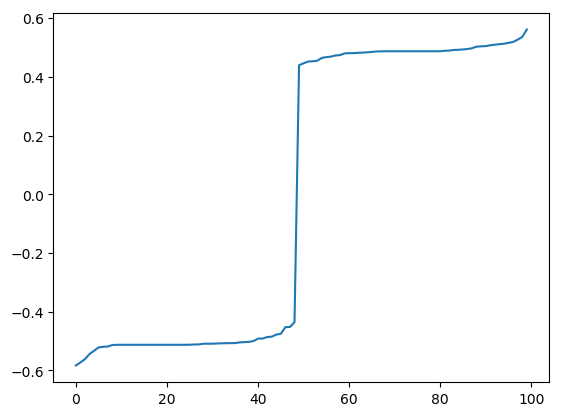

cluster_node[cluster_node(true, 0.251403, 1, 3, 5, 0.0654466, 0.0222518, -0.163705), cluster_node(true, 0.231212, 6, 8, 28, 0.00858727, 0.0428329, -0.179792), cluster_node(true, 0.228833, 60, 66, 83, 0.0350152, 0.0482406, -0.145577), cluster_node(true, 0.211819, 45, 46, 49, 0.00530321, 0.0508585, -0.155657), cluster_node(true, 0.25277, 84, 88, 95, 0.029484, 0.0690143, -0.154271), cluster_node(true, 0.227123, 96, 99, 100, 0.0800605, 0.0, -0.147062), cluster_node(true, 0.109025, 29, 36, 40, 0.0180093, 0.0178575, -0.0731585), cluster_node(true, 0.026271, 41, 42, 44, 0.000367032, 0.00273718, -0.0231668), cluster_node(true, 0.0756373, 50, 51, 54, 0.0129289, 0.00781297, -0.0548954), cluster_node(true, 0.0477699, 55, 57, 59, 0.0129485, 0.00270364, -0.0321178)]

In [10]:
i=1
    p = sortperm(gradient_root[i,:])
    vector = gradient_root[i,p]
    cluster_node_list = greedy_split_cluster(10,vector)
    plot(vector)
    print(cluster_node_list)


In [13]:
#vector=ones(100)
perform_clustering(10, gradient_root[1,:])

10-element Array{Any,1}:
 [20, 33, 95, 45, 67]                                                              
 [41, 23, 63, 72, 8, 14, 18, 24, 43, 46  …  59, 61, 79, 82, 84, 97, 98, 91, 85, 77]
 [9, 31, 44, 71, 62, 12, 93, 56, 22, 6  …  36, 48, 57, 58, 65, 76, 83, 94, 51, 30] 
 [68, 64, 29, 80, 69]                                                              
 [21, 40, 81, 55, 92, 28, 87, 37, 66, 52, 88, 1]                                   
 [10, 78, 4, 11, 34]                                                               
 [86, 49, 19, 96, 70, 50, 73, 5, 2, 25, 60, 16]                                    
 [90, 7, 89, 3]                                                                    
 [26, 100, 35, 13, 75]                                                             
 [39, 38, 42, 99, 74]                                                              

In [31]:
print([(i,j) for (i,j) in enumerate(2:5)])

Tuple{Int64,Int64}[(1, 2), (2, 3), (3, 4), (4, 5)]